### Lendo os dados

In [1]:
import pandas as pd

df_raw = pd.read_csv("https://raw.githubusercontent.com/FelipeMMMendes/Machine-Learning-Churn-Project/main/Data/train_churn.csv", delimiter=";")

### Verificação e tratamento da base de dados

In [2]:
df_raw.head()

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0


In [3]:
#deletando coluna Unnamed: 0

#vamos agora diferenciar, o df_raw é o df cru, sem tratamento, é no df em que faremos a limpeza dos dados
df = df_raw

df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 4759 non-null   object 
 1   idoso                  4735 non-null   float64
 2   parceiro               4762 non-null   object 
 3   dependentes            4766 non-null   object 
 4   tempoDeServico         4747 non-null   float64
 5   ServicoTelefone        4789 non-null   object 
 6   MultiLinhas            4745 non-null   object 
 7   ServicoInternet        4771 non-null   object 
 8   ServicoSegurancaCyber  4778 non-null   object 
 9   ServicoBackup          4737 non-null   object 
 10  SeguroDispositivos     4750 non-null   object 
 11  ServicoSuporteTecnico  4767 non-null   object 
 12  StreamingTV            4751 non-null   object 
 13  StreamingFilmes        4775 non-null   object 
 14  Contrato               4738 non-null   object 
 15  Bill

In [5]:
#temos que fazer algumas normalizações dos dados, têm colunas que podem ser transformadas em números binários
#coluna genero
#Masculino vai passar a ser 1
#Feminino vai passar a ser 0
df['genero'] = df['genero'].map({'Masculino': 1, 'Feminino': 0})

In [6]:
#coluna parceiro
#Se tem parceiro (SIM) vai passar a ser 1
#Se não tem parceiro (NÃO) vai passar a ser 0
df['parceiro'] = df['parceiro'].map({'Sim': 1, 'Não': 0})

In [7]:
#coluna dependentes
#Se tem dependentes (SIM) vai passar a ser 1
#Se não tem dependentes (NÃO) vai passar a ser 0
df['dependentes'] = df['dependentes'].map({'Sim': 1, 'Não': 0})

In [8]:
#existem valores negativos na coluna de tempoDeServico, o que é estranho, pois qual o sentido de uma pessoa ter usado um serviço durante um tempo menor que 0?
quantNegativos = df.loc[df['tempoDeServico'] < 0]

#como o quantNegativos retorna um df, vamos usar o shape, que retorna linhas e colunas, como queremos so linhas (primeiro elemento), usamos o shape[0]
print(f"Numero de registros negativos antes: {quantNegativos.shape[0]}")

#vamos colocar o valor como 0, como se nunca tivessem usado o serviço, aqui usamos o .apply passando uma lambda function
df['tempoDeServico'] = df['tempoDeServico'].apply(lambda x: 0 if x < 0 else x)

quantNegativos = df.loc[df['tempoDeServico'] < 0]

print(f"Numero de registros depois: {quantNegativos.shape[0]}")

Numero de registros negativos antes: 103
Numero de registros depois: 0


In [9]:
#coluna ServicoTelefone
#Se tem servico de telefone (SIM) vai passar a ser 1
#Se não tem servico de telefone(NÃO) vai passar a ser 0
df['ServicoTelefone'] = df['ServicoTelefone'].map({'Sim': 1, 'Não': 0})

In [10]:
#coluna MultiLinhas
#Se tem mais de uma linha de servico de telefone (SIM) vai passar a ser 2
#Se não tem mais de uma linha de servico de telefone(NÃO) vai passar a ser 1
#Se não tem nenhum serviço de telefone vai passar a ser 0
df['MultiLinhas'] = df['MultiLinhas'].map({'Sim': 1, 'Não': 0, 'Sem serviço de telefone':-1})

In [11]:
#coluna ServicoInternet
#Se é DSL vai passar a ser 1
#Se é Fibra Óptica vai passar a ser 2
#Se não tem nenhum serviço de internet vai passar a ser 0
df['ServicoInternet'] = df['ServicoInternet'].map({'DSL': 1, 'Fibra óptica': 2, 'Não': 0})

In [12]:
#coluna ServicoSegurancaCyber
#se tiver um serviço de segurança na internet (SIM) vai passar a ser 1
#se não tiver um serviço de segurança na internet (NÃO) vai passar a ser 0
#se não tem nenhum serviço de internet vai passar a ser -1
df['ServicoSegurancaCyber'] = df['ServicoSegurancaCyber'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet':-1})

In [13]:
#coluna ServicoBackup
#Se tem serviço de backup (SIM) vai ser 1
#Se não tem serviço de bakcup (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['ServicoBackup'] = df['ServicoBackup'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [14]:
#coluna SeguroDispositivos
#Se tem seguro para dispositivos (SIM) vai ser 1
#Se não tem seguro para dispositivos (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['SeguroDispositivos'] = df['SeguroDispositivos'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [15]:
#coluna ServicoSuporteTecnico
#Se tem serviço de suporte técnico (SIM) vai ser 1
#Se não tem serviço de suporte técnico (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['ServicoSuporteTecnico'] = df['ServicoSuporteTecnico'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [16]:
#coluna StreamingTV
#Se tem serviço de Streaming de canais de TV (SIM) vai ser 1
#Se não tem serviço de Streaming de canais de TV (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['StreamingTV'] = df['StreamingTV'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [17]:
#coluna StreamingFilmes
#Se tem serviço de Streaming de filmes (SIM) vai ser 1
#Se não tem serviço de Streaming de filmes (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['StreamingFilmes'] = df['StreamingFilmes'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [18]:
#coluna Contrato
#vamos mudar a escala para mês
#Mensal passa a ser 1
#1 Ano passa a ser 12
#2 anos passa a ser 24
df['Contrato'] = df['Contrato'].map({'Mensal': 1, '1 Ano': 12, '2 Anos': 24})

In [19]:
#coluna BillingDigital
#se o cliente recebe fatura digital (SIM) vai ser 1
#se o cliente não recebe a fatura digital (NÃO) vai ser 0
df['BillingDigital'] = df['BillingDigital'].map({'Sim': 1, 'Não': 0})

In [20]:
#coluna MetodoPagamento
#se for Cheque Eletrônico vai ser 0
#se for Cheque por Carta vai ser 1
#se for Transferência Bancária (Automática) vai ser 2
#se for Cartão de Crédito (Automático) vai ser 3
df['MetodoPagamento'] = df['MetodoPagamento'].map({'Cheque Eletrônico': 0, 'Cheque por Carta': 1, 'Transferência Bancária (Automática)': 2, 'Cartão de Crédito (Automático)': 3})

In [21]:
#coluna FaturaTotal
#essa coluna está armazenando os números como string, vamos passar ela para float
# Convertendo uma coluna de strings para float usando astype()
df['FaturaTotal'] = pd.to_numeric(df['FaturaTotal'], errors='coerce')

In [22]:
# Contar o número de valores nulos em cada coluna
num_valores_nulos_por_coluna = df.isnull().sum()

# Exibir o resultado
print(num_valores_nulos_por_coluna)


genero                   241
idoso                    265
parceiro                 238
dependentes              234
tempoDeServico           253
ServicoTelefone          211
MultiLinhas              255
ServicoInternet          229
ServicoSegurancaCyber    222
ServicoBackup            263
SeguroDispositivos       250
ServicoSuporteTecnico    233
StreamingTV              249
StreamingFilmes          225
Contrato                 262
BillingDigital           238
MetodoPagamento          244
FaturaMensal             274
FaturaTotal              247
NumTickets               269
NumTicketsTecnico        255
Churn                    264
dtype: int64


In [23]:
df.describe()

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,ServicoBackup,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
count,4759.00000,4735.000000,4762.000000,4766.000000,4747.000000,4789.000000,4745.000000,4771.000000,4778.000000,4737.000000,...,4751.000000,4775.000000,4738.000000,4762.000000,4756.000000,4726.000000,4753.000000,4731.000000,4745.000000,4736.000000
mean,0.50851,0.163464,0.487400,0.304029,33.243733,0.902067,0.319283,1.224272,0.081206,0.129829,...,0.169438,0.175916,8.772056,0.591978,1.321278,64.801947,2275.284252,0.503488,0.411170,0.263091
std,0.49998,0.369827,0.499894,0.460043,27.044067,0.297255,0.641997,0.773788,0.705030,0.733080,...,0.752903,0.755684,9.532782,0.491519,1.148225,35.930051,2248.815792,1.260113,1.230994,0.440358
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.000000,0.000000,0.000000,-127.000000,18.850000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,34.700000,385.550000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,70.400000,1410.250000,0.000000,0.000000,0.000000
75%,1.00000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,12.000000,1.000000,2.000000,90.400000,3778.200000,0.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,190.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,24.000000,1.000000,3.000000,247.000000,8672.450000,5.000000,8.000000,1.000000


In [24]:
#vamos tirar todos os nulos de Churn, não há como tratar os nulos dessa variável alvo
df.dropna(axis=0,inplace=True)

#### Análise do mapa de calor

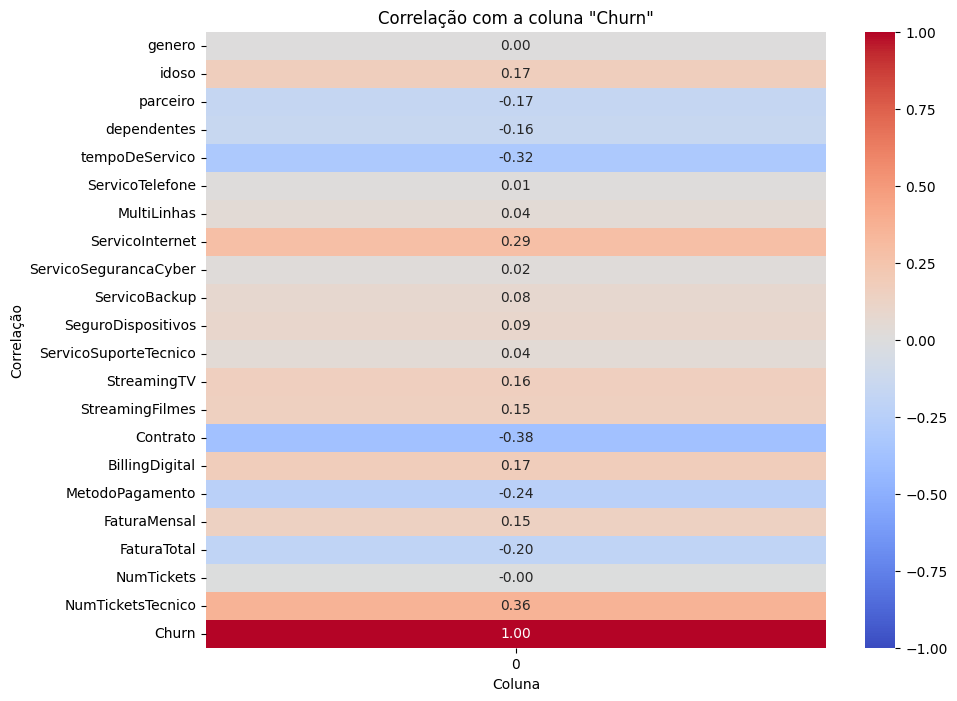

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular as correlações da coluna de interesse com todas as outras colunas
correlacoes_coluna_interesse = df.corrwith(df['Churn'])

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_coluna_interesse.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlação com a coluna "Churn"')
plt.xlabel('Coluna')
plt.ylabel('Correlação')
plt.show()


### Separação dos Dados

In [26]:
#separação em variáveis alvo e auxiliares
y = df['Churn']

X = df.drop('Churn',axis=1)

In [27]:
#vamos dropar as colunas que acredito serem menos impactantes no modelo
X = X.drop(columns=['genero', 'idoso', 'ServicoSegurancaCyber'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split

X.dropna(axis=0, inplace=True)
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
# Verificar o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(y_train))

Tamanho do conjunto de treinamento: 1337
Tamanho do conjunto de teste: 1337


### Modelo CatBoostClassifier

In [30]:
#fazendo os imports necessarios
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
     
#cria o objeto cru do modelo
model_catboost = CatBoostClassifier(depth=10,learning_rate=0.04,iterations=100)


In [31]:
#vamos usar o GridSearchCV para determinar os melhores hiperparâmetros
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
            }

Grid_CBC = GridSearchCV(estimator=model_catboost, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train,)

0:	learn: 0.6752677	total: 141ms	remaining: 1.27s
1:	learn: 0.6582084	total: 142ms	remaining: 570ms
2:	learn: 0.6431137	total: 144ms	remaining: 336ms
3:	learn: 0.6295202	total: 145ms	remaining: 217ms
4:	learn: 0.6157485	total: 146ms	remaining: 146ms
5:	learn: 0.6028848	total: 148ms	remaining: 98.4ms
6:	learn: 0.5918363	total: 149ms	remaining: 63.9ms
7:	learn: 0.5805404	total: 150ms	remaining: 37.6ms
8:	learn: 0.5687850	total: 151ms	remaining: 16.8ms
9:	learn: 0.5578169	total: 153ms	remaining: 0us


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021582ED3D10>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [32]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8549056595329521

 The best parameters across ALL searched params:
 {'depth': 7, 'iterations': 10, 'learning_rate': 0.04}


In [33]:
#vamos usar os parametros indicados pelo gridsearch
model_catboost = CatBoostClassifier(depth=7,learning_rate=0.04,iterations=10)

model_catboost.fit(X=X_train,y=y_train,eval_set=(X_test,y_test))

0:	learn: 0.6752677	test: 0.6767198	best: 0.6767198 (0)	total: 1.83ms	remaining: 16.5ms
1:	learn: 0.6582084	test: 0.6611897	best: 0.6611897 (1)	total: 2.83ms	remaining: 11.3ms
2:	learn: 0.6431137	test: 0.6479299	best: 0.6479299 (2)	total: 4.17ms	remaining: 9.72ms
3:	learn: 0.6295202	test: 0.6364796	best: 0.6364796 (3)	total: 5.26ms	remaining: 7.89ms
4:	learn: 0.6157485	test: 0.6239907	best: 0.6239907 (4)	total: 6.74ms	remaining: 6.74ms
5:	learn: 0.6028848	test: 0.6115742	best: 0.6115742 (5)	total: 8.19ms	remaining: 5.46ms
6:	learn: 0.5918363	test: 0.6013776	best: 0.6013776 (6)	total: 9.67ms	remaining: 4.14ms
7:	learn: 0.5805404	test: 0.5921612	best: 0.5921612 (7)	total: 11.1ms	remaining: 2.79ms
8:	learn: 0.5687850	test: 0.5807152	best: 0.5807152 (8)	total: 12.3ms	remaining: 1.36ms
9:	learn: 0.5578169	test: 0.5705287	best: 0.5705287 (9)	total: 13.7ms	remaining: 0us

bestTest = 0.5705286588
bestIteration = 9



#### Teste Empírico (Métricas na base de treino)

In [62]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_catboost = model_catboost.predict(X_train)

acuracia_catboost_emp = accuracy_score(y_train,previsoes_catboost)
recall_catboost_emp = recall_score(y_train, previsoes_catboost)
f1_catboost_emp = f1_score(y_train, previsoes_catboost)

print(f"Acuracia do Catboost (base de treino): {acuracia_catboost_emp}")
print(f"Recall do Catboost (base de treino): {recall_catboost_emp}")
print(f"F1_catboost do Catboost (base de treino): {f1_catboost_emp}")

Acuracia do Catboost (base de treino): 0.8526551982049364
Recall do Catboost (base de treino): 0.6802325581395349
F1_catboost do Catboost (base de treino): 0.7037593984962406


#### Teste Estrutural (Métricas na base de teste)

In [75]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_catboost = model_catboost.predict(X_test)

acuracia_catboost_est = accuracy_score(y_test,previsoes_catboost)
recall_catboost_est = recall_score(y_test, previsoes_catboost)
f1_catboost_est = f1_score(y_test, previsoes_catboost)

print(f"Acuracia do Catboost (base de teste): {acuracia_catboost_est}")
print(f"Recall do Catboost (base de teste): {recall_catboost_est}")
print(f"F1_catboost do Catboost (base de teste): {f1_catboost_est}")

Acuracia do Catboost (base de teste): 0.8119402985074626
Recall do Catboost (base de teste): 0.5729166666666666
F1_catboost do Catboost (base de teste): 0.6358381502890174


### Modelo Rede Neural

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import accuracy_score

# Instanciar o modelo de rede neural
modelo_rede_neural = Sequential()

# Adicionar a camada de entrada e a primeira camada oculta
modelo_rede_neural.add(Input(shape=(X_train.shape[1],)))

# Adicionar uma camada oculta
modelo_rede_neural.add(Dense(units=64, activation='relu'))

# Adicionar uma camada oculta
modelo_rede_neural.add(Dense(units=64, activation='relu'))

modelo_rede_neural.add(Dropout(rate=0.2))

# Adicionar uma camada oculta
modelo_rede_neural.add(Dense(units=64, activation='relu'))

# Adicionar a camada de saída
modelo_rede_neural.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
modelo_rede_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo com os dados de treinamento
modelo_rede_neural.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.6754 - loss: 15.1994 
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.6663 - loss: 4.7618
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.6808 - loss: 2.8661
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.6835 - loss: 2.3211
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.6662 - loss: 1.8855
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.6723 - loss: 2.6696
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6867 - loss: 0.9777
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.7217 - loss: 0.9457
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.7309 - loss: 0.8762
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7253 - loss: 0.6954


#### Teste Empírico Rede Neural - Base de Treino

In [79]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Fazer previsões nos dados de teste
previsoes_rede_neural = modelo_rede_neural.predict(X_train)

# Definir um limiar de decisão
limiar = 0.5

# Converter as probabilidades em classes binárias usando o limiar de decisão
previsoes_binarias = (previsoes_rede_neural > limiar).astype(int)

acuracia_NN_emp = accuracy_score(y_train, previsoes_binarias)
recall_NN_emp = recall_score(y_train, previsoes_binarias)
f1_NN_emp = f1_score(y_train, previsoes_binarias)

print(f"Acuracia da Rede Neural (base de treino): {acuracia_NN_emp}")
print(f"Recall da Rede Neural (base de treino): {recall_NN_emp}")
print(f"F1_catboost da Rede Neural (base de treino): {f1_NN_emp}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
Acuracia da Rede Neural (base de treino): 0.7756170531039641
Recall da Rede Neural (base de treino): 0.2877906976744186
F1_catboost da Rede Neural (base de treino): 0.39759036144578314


#### Teste Estrutural Rede Neural - Base de Teste

In [77]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Fazer previsões nos dados de teste
previsoes_rede_neural = modelo_rede_neural.predict(X_test)

# Definir um limiar de decisão
limiar = 0.5

# Converter as probabilidades em classes binárias usando o limiar de decisão
previsoes_binarias = (previsoes_rede_neural > limiar).astype(int)

acuracia_NN_est = accuracy_score(y_test, previsoes_binarias)
recall_NN_est = recall_score(y_test, previsoes_binarias)
f1_NN_est = f1_score(y_test, previsoes_binarias)

print(f"Acuracia da Rede Neural (base de teste): {acuracia_NN_est}")
print(f"Recall da Rede Neural (base de teste): {recall_NN_est}")
print(f"F1_catboost da Rede Neural (base de teste): {f1_NN_est}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
Acuracia da Rede Neural (base de teste): 0.7731343283582089
Recall da Rede Neural (base de teste): 0.2708333333333333
F1_catboost da Rede Neural (base de teste): 0.40625


### Modelo Árvore de Decisão

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Instanciar o modelo de árvore de decisão
modelo_decision_tree = DecisionTreeClassifier()

# Definir os parâmetros que você deseja ajustar
parametros = {
    'max_depth': [3, 5, 7],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em uma folha
}

# Instanciar o GridSearchCV com o modelo de árvore de decisão e os parâmetros definidos
grid_search = GridSearchCV(estimator=modelo_decision_tree, param_grid=parametros, cv=5)

# Treinar o GridSearchCV com os dados de treinamento
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [39]:
print(f"Melhores parametros segundo o GridSearch {grid_search.best_params_}")
print(f"Melhor score segundo o GridSearch {grid_search.best_score_}")
print(f"Melhores estimadores segundo o GridSearch {grid_search.best_estimator_}")

Melhores parametros segundo o GridSearch {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor score segundo o GridSearch 0.8324529040192298
Melhores estimadores segundo o GridSearch DecisionTreeClassifier(max_depth=5, min_samples_split=5)


In [40]:
modelo_decision_tree.set_params(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2)

modelo_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

#### Árvore de Decisão - Teste Empírico (Métricas na base de treino)

In [80]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_arvore_decisao = modelo_decision_tree.predict(X_train)

acuracia_arvore_decisao_emp = accuracy_score(y_train,previsoes_arvore_decisao)
recall_arvore_decisao_emp = recall_score(y_train, previsoes_arvore_decisao)
f1_arvore_decisao_emp = f1_score(y_train, previsoes_arvore_decisao)

print(f"Acuracia da árvore de decisão (base de treino): {acuracia_arvore_decisao_emp}")
print(f"Recall do árvore de decisão (base de treino): {recall_arvore_decisao_emp}")
print(f"F1_catboost do árvore de decisão (base de treino): {f1_arvore_decisao_emp}")

Acuracia da árvore de decisão (base de treino): 0.8691099476439791
Recall do árvore de decisão (base de treino): 0.7412790697674418
F1_catboost do árvore de decisão (base de treino): 0.7445255474452555


#### Árvore de Decisão - Teste Estrutural (Métricas na base de teste)

In [81]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_arvore_decisao = modelo_decision_tree.predict(X_test)

acuracia_arvore_decisao_est = accuracy_score(y_test,previsoes_arvore_decisao)
recall_arvore_decisao_est = recall_score(y_test, previsoes_arvore_decisao)
f1_arvore_decisao_est = f1_score(y_test, previsoes_arvore_decisao)

print(f"Acuracia do arprevisoes_arvore_decisao (base de teste): {acuracia_arvore_decisao_est}")
print(f"Recall do arprevisoes_arvore_decisao (base de teste): {recall_arvore_decisao_est}")
print(f"F1_arprevisoes_arvore_decisao do arprevisoes_arvore_decisao (base de teste): {f1_arvore_decisao_est}")

Acuracia do arprevisoes_arvore_decisao (base de teste): 0.8029850746268656
Recall do arprevisoes_arvore_decisao (base de teste): 0.5833333333333334
F1_arprevisoes_arvore_decisao do arprevisoes_arvore_decisao (base de teste): 0.6292134831460674


### Modelo Regressão Logística

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instanciar o modelo de regressão logística
modelo_reglog = LogisticRegression(random_state=42)

# Treinar o modelo com os dados de treinamento
modelo_reglog.fit(X_train, y_train)

c:\Users\Felipe\Desktop\Projtos\Churn_ML_FinalProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#### Regressão Logística - Teste Empírico (Base de Treino)

In [70]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_reglog = modelo_reglog.predict(X_train)

acuracia_reglog_emp = accuracy_score(y_train,previsoes_reglog)
recall_reglog_emp = recall_score(y_train, previsoes_reglog)
f1_reglog_emp = f1_score(y_train, previsoes_reglog)

print(f"Acuracia do Regressão logística (base de treino): {acuracia_reglog_emp}")
print(f"Recall do Regressão logística (base de treino): {recall_reglog_emp}")
print(f"F1_catboost do Regressão logística (base de treino): {f1_reglog_emp}")

Acuracia do Regressão logística (base de treino): 0.8511593118922962
Recall do Regressão logística (base de treino): 0.6773255813953488
F1_catboost do Regressão logística (base de treino): 0.7007518796992481


#### Regressão Logística - Teste Estrutural (Base de Testes)

In [69]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_reglog = modelo_reglog.predict(X_test)

acuracia_reglog_est = accuracy_score(y_test, previsoes_reglog)
recall_reglog_est = recall_score(y_test, previsoes_reglog)
f1_reglog_est = f1_score(y_test, previsoes_reglog)

print(f"Acuracia do Regressão logística (base de teste): {acuracia_reglog_est}")
print(f"Recall do Regressão logística (base de teste): {recall_reglog_est}")
print(f"F1_catboost do Regressão logística (base de teste): {f1_reglog_est}")

Acuracia do Regressão logística (base de teste): 0.826865671641791
Recall do Regressão logística (base de teste): 0.6041666666666666
F1_catboost do Regressão logística (base de teste): 0.6666666666666666


### Modelo SVM

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instanciar o modelo SVM
modelo_svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# Treinar o modelo com os dados de treinamento
modelo_svm.fit(X_train, y_train)

SVC()

#### SVM - Teste Empírico (Base de Treino)

In [73]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Fazer previsões nos dados de teste
previsoes_svm = modelo_svm.predict(X_train)

acuracia_svm_emp = accuracy_score(y_train, previsoes_svm)
recall_svm_emp = recall_score(y_train, previsoes_svm)
f1_svm_emp = f1_score(y_train, previsoes_svm)

#Não sei porque mas o Recall e o F1 dão 0
print(f"Acuracia do SVM (base de treino): {acuracia_svm_emp}")
print(f"Recall do SVM (base de treino): {recall_svm_emp}")
print(f"F1_catboost do SVM (base de treino): {f1_svm_emp}")

Acuracia do Regressão logística (base de teste): 0.7427075542258789
Recall do Regressão logística (base de teste): 0.0
F1_catboost do Regressão logística (base de teste): 0.0


#### SVM - Teste Estrutural (Base de Teste)

In [74]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

previsoes_svm = modelo_svm.predict(X_test)

acuracia_svm_est = accuracy_score(y_test, previsoes_svm)
recall_svm_est = recall_score(y_test, previsoes_svm)
f1_svm_est = f1_score(y_test, previsoes_svm)

print(f"Acuracia do SVM (base de teste): {acuracia_svm_est}")
print(f"Recall do SVM (base de teste): {recall_svm_est}")
print(f"F1_catboost do SVM (base de teste): {f1_svm_est}")

Acuracia do SVM (base de teste): 0.7134328358208956
Recall do SVM (base de teste): 0.0
F1_catboost do SVM (base de teste): 0.0


### Comparação das métricas dos modelos (Segundo Ponto de Controle)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


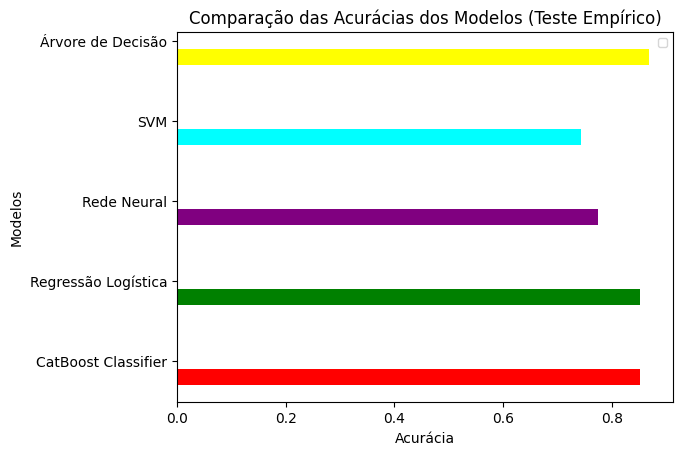

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


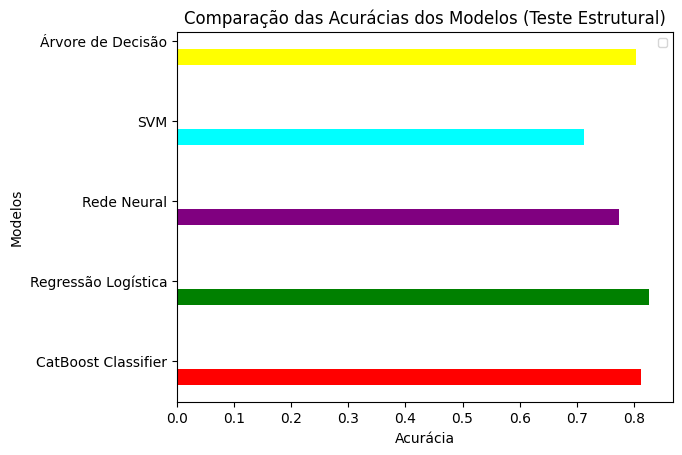

In [96]:
import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']
acuracias = [acuracia_catboost_emp, acuracia_reglog_emp, acuracia_NN_emp, acuracia_svm_emp, acuracia_arvore_decisao_emp]
# recall = [recall_modelo1, recall_modelo2, recall_modelo3, recall_modelo4, recall_modelo5]
# f1_scores = [f1_score_modelo1, f1_score_modelo2, f1_score_modelo3, f1_score_modelo4, f1_score_modelo5]

# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))

# Plotar as barras para precisão
plt.barh(indices, acuracias, largura_barra, color = ["red","green","purple","cyan","yellow"])

# Plotar as barras para recall
# plt.bar([i + largura_barra for i in indices], recall, largura_barra, label='Recall')

# # Plotar as barras para F1-score
# plt.bar([i + 2 * largura_barra for i in indices], f1_scores, largura_barra, label='F1-score')

# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação das Acurácias dos Modelos (Teste Empírico)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()

import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']
acuracias = [acuracia_catboost_est, acuracia_reglog_est, acuracia_NN_est, acuracia_svm_est, acuracia_arvore_decisao_est]
# recall = [recall_modelo1, recall_modelo2, recall_modelo3, recall_modelo4, recall_modelo5]
# f1_scores = [f1_score_modelo1, f1_score_modelo2, f1_score_modelo3, f1_score_modelo4, f1_score_modelo5]

# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))

# Plotar as barras para precisão
plt.barh(indices, acuracias, largura_barra, color = ["red","green","purple","cyan","yellow"])


# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação das Acurácias dos Modelos (Teste Estrutural)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


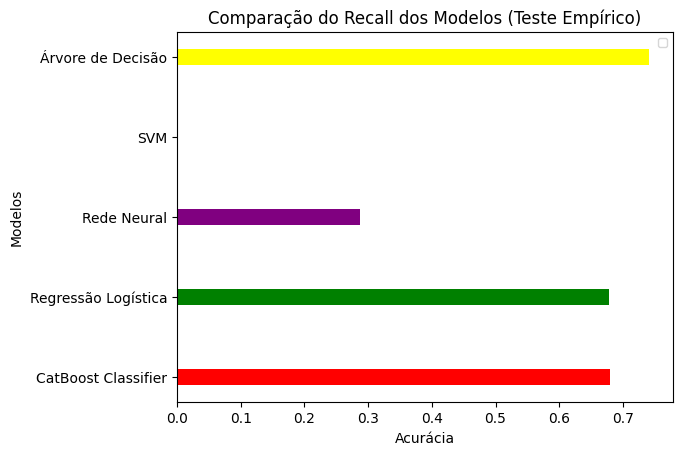

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


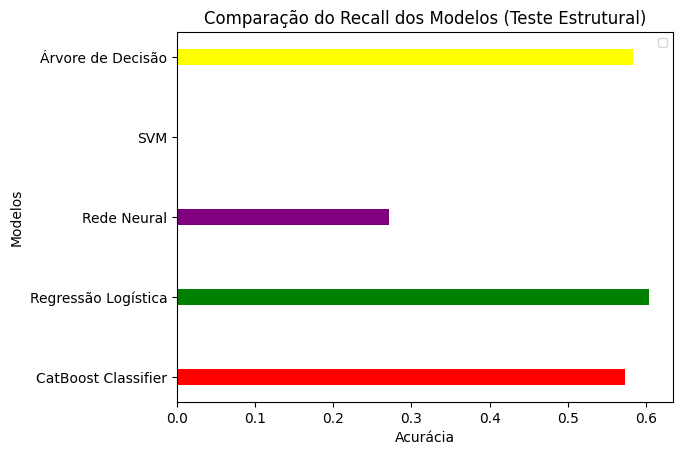

In [104]:
import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']
recall = [recall_catboost_emp, recall_reglog_emp, recall_NN_emp, recall_svm_emp, recall_arvore_decisao_emp]


# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))


# Plotar as barras para recall
plt.barh([i + largura_barra for i in indices], recall, largura_barra, color = ["red","green","purple","cyan","yellow"])


# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação do Recall dos Modelos (Teste Empírico)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()

import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']

recall = [recall_catboost_est, recall_reglog_est, recall_NN_est, recall_svm_est, recall_arvore_decisao_est]

# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))

# Plotar as barras para recall
plt.barh([i + largura_barra for i in indices], recall, largura_barra, color = ["red","green","purple","cyan","yellow"])


# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação do Recall dos Modelos (Teste Estrutural)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


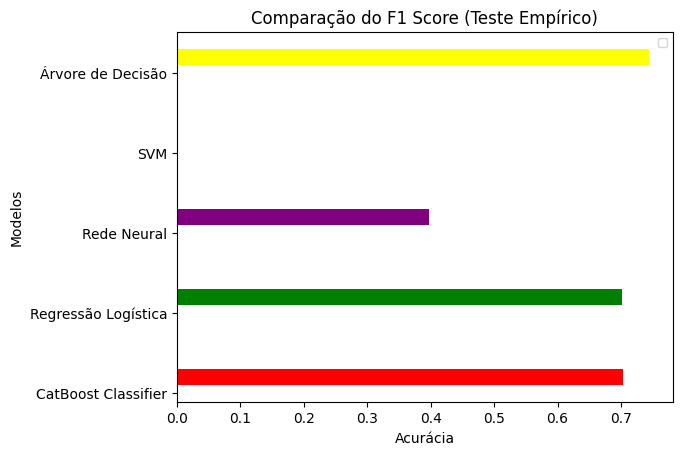

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


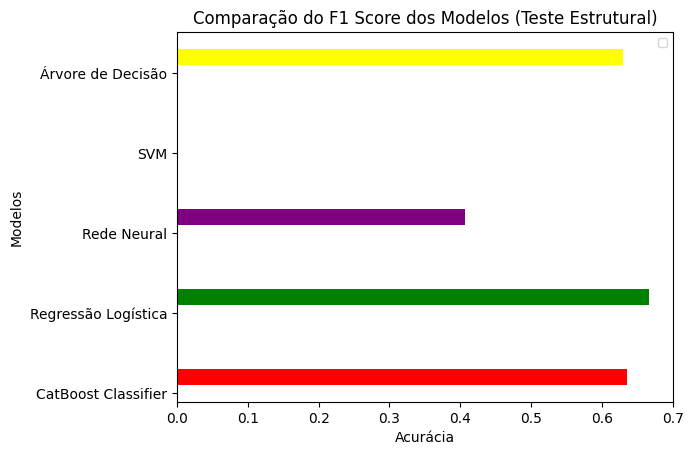

In [106]:
import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']

f1_scores = [f1_catboost_emp, f1_reglog_emp, f1_NN_emp, f1_svm_emp, f1_arvore_decisao_emp]

# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))



# Plotar as barras para F1-score
plt.barh([i + 2 * largura_barra for i in indices], f1_scores, largura_barra, color = ["red","green","purple","cyan","yellow"])

# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação do F1 Score (Teste Empírico)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()

import matplotlib.pyplot as plt

# Métricas dos cinco modelos
nomes_modelos = ['CatBoost Classifier', 'Regressão Logística', 'Rede Neural', 'SVM', 'Árvore de Decisão']

f1_scores = [f1_catboost_est, f1_reglog_est, f1_NN_est, f1_svm_est, f1_arvore_decisao_est]

# Definir a largura das barras
largura_barra = 0.2

# Criar índices para as posições das barras
indices = range(len(nomes_modelos))


# # Plotar as barras para F1-score
plt.barh([i + 2 * largura_barra for i in indices], f1_scores, largura_barra, color = ["red","green","purple","cyan","yellow"])

# Adicionar legendas, rótulos e título
plt.ylabel('Modelos')
plt.xlabel('Acurácia')
plt.title('Comparação do F1 Score dos Modelos (Teste Estrutural)')
plt.yticks([i + largura_barra for i in indices], nomes_modelos)
plt.legend(fontsize='small')

# Mostrar o gráfico
plt.show()

#### Gráfico Bias-Variance dos Modelos

In [ ]:
# Exemplo, visualizaremos o efeito do bias e da variância ao ajustar a complexidade de um modelo e entenderemos sua relação com o erro total
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculando bias e variance
        bias = np.mean((predictions - y_test) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test, predictions)

        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors


biases, variances, errors = calculate_bias_variance([modelo_svm,model_catboost,modelo_decision_tree,modelo_rede_neural,modelo_svm], X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 10), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 10), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 10), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Diferentes Graus de Polinômios')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# A medida que o grau do polinômio aumenta, o bias diminui, mas a variância aumenta.
# O erro total tem um ponto de mínimo, onde a combinação de bias e variância é ótima.